# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [14]:
random_state = 1000
df = pd.read_csv("crypto.csv")
data_size = 100000 #Change this to adjust the dataset size partition

# Data Preprocessing

Say that selected both datasets because in small datasets we got super good results immediately an

In [15]:
# df.isna().sum()
df.dropna(inplace = True)

In [ ]:
# df.head() # We can see data is already sorted based on date so we can drop the date column.

In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500004 entries, 0 to 500003
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   amount  500004 non-null  float64
 1   open    500004 non-null  float64
 2   high    500004 non-null  float64
 3   low     500004 non-null  float64
 4   close   500004 non-null  float64
 5   count   500004 non-null  float64
 6   vol     500004 non-null  float64
dtypes: float64(7)
memory usage: 30.5 MB


In [16]:
df.drop(['time', 'id'], axis=1, inplace=True)

**Plotting the correlation map**

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")
# Shows almost no correlation between amount and closing price

**Scaling the data and creating datasets**

In [ ]:
# df.head()

In [17]:
scale = StandardScaler()
df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)

In [18]:
y = df_sc['close'] # The aim is to predict the closing price of Netflix' stock.
X = df_sc.drop('close', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X[:data_size], y[:data_size], test_size=0.4, random_state=random_state) # Splitting as 60% train test, 40% test set.

# Regression with SVR

In [ ]:
SVM_regression = SVR(C=1, kernel='rbf')

In [ ]:
SVM_regression.fit(X_train, y_train) # training the model.

SVR(C=1)

In [ ]:
y_pred = SVM_regression.predict(X_test) # Predicting values

In [ ]:
predictions = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})

**Evaluating the model**

In [ ]:
MSE_test = round(np.mean(np.square(y_test- y_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
print(RMSE_test, SVM_regression.score(X_test, y_test))

In [ ]:
predictions.head()

# Grid Search and Optimal Model

In [ ]:
param_grid = {'C': [1,10,100], 'gamma': [10, 1,0.1,0.01], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'degree' : [3,5,9]}

In [ ]:
grid = GridSearchCV(estimator=SVR(),param_grid= param_grid, refit = True, verbose=3, cv=2)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

{'C': 1, 'degree': 3, 'gamma': 10, 'kernel': 'rbf'}

In [ ]:
y_pred_best = grid.predict(X_test)

In [ ]:
MSE_test = round(np.mean(np.square(y_test- y_pred_best)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
print(RMSE_test, grid.best_estimator_.score(X_test, y_test))

0.0 -0.08013226430653342


# Optimal Model

In [20]:
optimal = SVR(C=1, gamma = 0.1, kernel = 'rbf') # Change the gamma to 0.1 and see what happens. Hint: Magic!

In [21]:
optimal.fit(X_train, y_train)

SVR(C=1, gamma=0.1)

In [22]:
y_optimal = optimal.predict(X_test)

In [23]:
MSE_opt = round(np.mean(np.square(y_test - y_optimal)),4)
RMSE_opt = round(np.sqrt(MSE_opt),4)
print(RMSE_opt, optimal.score(X_test, y_test))

0.04 0.9762982680695189


**Saving the trained model**

In [25]:
import joblib
joblib.dump(optimal, 'CryptoSVR.joblib') # To load the trained model simply use joblib.load('CryptoSVR.joblib')

['CryptoSVR.joblib']

**Training the model in an increasing amount of data**

In [ ]:
partition = (1000, 10000, 100000, 250000, 500000)

In [ ]:
 for i in partition:
  X_train, X_test, y_train, y_test = train_test_split(X[:i], y[:i], test_size=0.4, random_state=random_state)
  optimal.fit(X_train, y_train)
  y_optimal = optimal.predict(X_test)
  MSE_opt = round(np.mean(np.square(y_test - y_optimal)),4) #asafg
  print("Number of samples: ", i, "RMSE: ", MSE_opt, "R2 score" , optimal.score(X_test, y_test))

Number of samples:  1000 RMSE:  0.0 R2 score -0.0018646318295356679
Number of samples:  10000 RMSE:  0.0017 R2 score -0.3787316548690043
Number of samples:  100000 RMSE:  0.0016 R2 score 0.9762982680695189
Number of samples:  250000 RMSE:  0.0008 R2 score 0.9953454419873903
Number of samples:  500000 RMSE:  0.0025 R2 score 0.9974602289920774


# Plotting the learning curve

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[:data_size], y[:data_size], test_size=0.4, random_state=random_state) # Splitting as 60% train test, 40% test set.
# Increasing the amount of samples to train

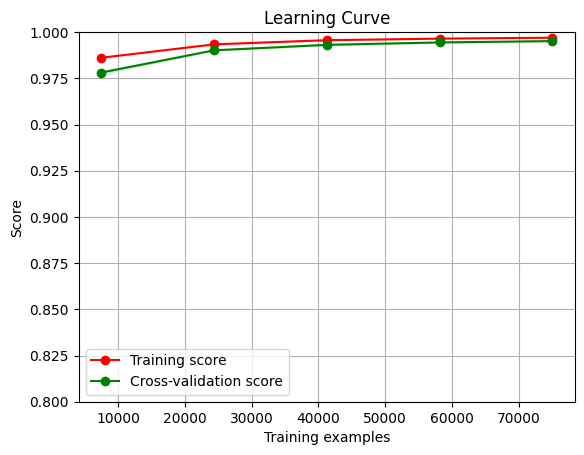

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, ylim, cv, n_jobs, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Usage example:
# Replace 'your_estimator', 'X_train', 'y_train' with your actual estimator and data
# Make sure to set appropriate ylim based on your metric (e.g., R^2 score ranges from -∞ to 1)
# You can also set other parameters like cv (cross-validation folds) and n_jobs (parallelization)
negative_infinity =  float('-inf')
plot_learning_curve(KNN, X_train, y_train, ylim=(0.8, 1), cv=2, n_jobs=-1)
plt.show()


In [ ]:
KNN.score(X_test, y_test)

0.9966088727365907

In [ ]:
MSE_opt = round(np.mean(np.square(y_test - y_knn)),6)
#RMSE_opt = round(np.sqrt(MSE_opt),4)
MSE_opt

4e-06

# Compare with KNN

In [ ]:
KNN = KNeighborsRegressor()

In [ ]:
KNN.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_knn = KNN.predict(X_test)